# Entropy of the transition matrices

__Objective:__ generate transition matrices the simplified way and sampling from a log-normal distribution, and then mix the two case. Compute the entropy in all cases.

In [43]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('../modules/')

from tree_generation import calcrho, compute_rho_entropy

sns.set_theme()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
q = 3

## Simplified transition matrices

Text(0.5, 1.0, 'Entropy (simplified transition matrices)')

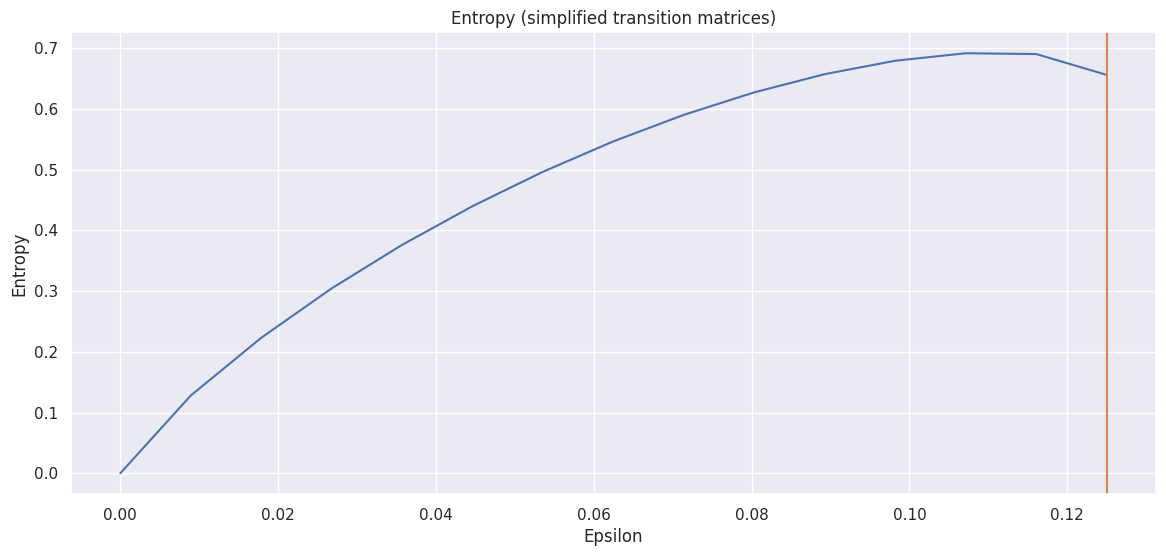

In [25]:
epsilon_max = 1. / (q ** 2 - 1.)

epsilons = np.linspace(0., epsilon_max, 15)
epsilons[0] += 1e-6
epsilons[-1] -= 1e-6

transition_matrices_simplified = [
    calcrho('simplified', q=3, eps=epsilon)
    for epsilon in epsilons
]

entropies = [
    compute_rho_entropy(rho, q=q) for rho in transition_matrices_simplified
]

fig = plt.figure(figsize=(14, 6))

sns.lineplot(
    x=epsilons,
    y=entropies,
    color=sns.color_palette()[0]
)

plt.axvline(
    x=epsilon_max,
    color=sns.color_palette()[1]
)

plt.xlabel('Epsilon')
plt.ylabel('Entropy')
plt.title('Entropy (simplified transition matrices)')

## Log-normally distributed matrices

In [42]:
sigmas = [0.2 + i * 0.2 for i in range(20)]

entropies = [
    [
        compute_rho_entropy(calcrho('lognormal', q=q, sigma=sigma), q)
        for _ in range(1000)
    ]
    for sigma in sigmas
]

In [53]:
lognormal_entropies_df = pd.DataFrame([
    {
        'sigma': sigma,
        'entropy': ent
    }
    for i, sigma in enumerate(sigmas)
    for ent in entropies[i]
])

lognormal_entropies_df

,sigma,entropy
0,0.2,0.685912
1,0.2,0.689700
2,0.2,0.689688
3,0.2,0.688048
4,0.2,0.688831
...,...,...
19995,4.0,0.108862
19996,4.0,0.201145
19997,4.0,0.263543
19998,4.0,0.142754


Text(0.5, 1.0, 'Entropy (log-normal transition matrices)')

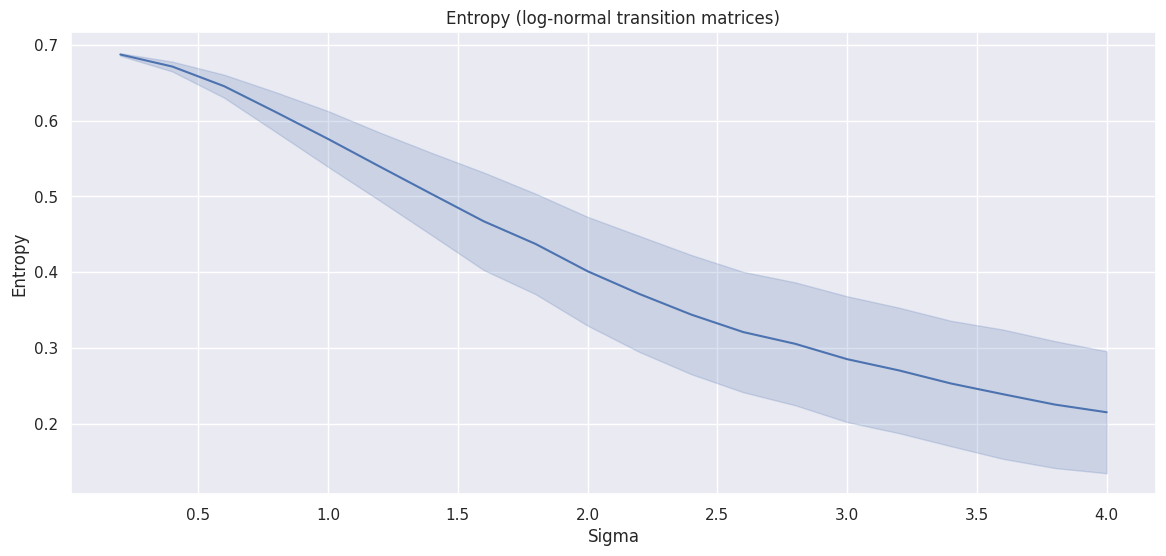

In [83]:
fig = plt.figure(figsize=(14, 6))

sns.lineplot(
    data=lognormal_entropies_df,
    x='sigma',
    y='entropy',
    errorbar='sd'
)

plt.xlabel('Sigma')
plt.ylabel('Entropy')
plt.title('Entropy (log-normal transition matrices)')

Text(0.5, 1.0, 'Distribution of entropies for log-normal transition matrices')

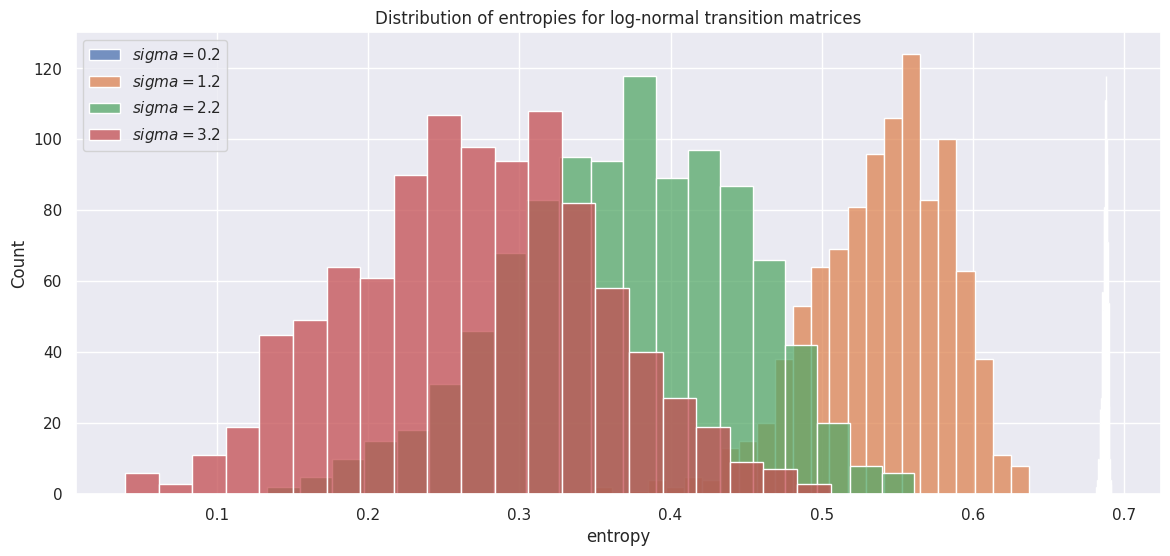

In [78]:
fig = plt.figure(figsize=(14, 6))

for ci, i in enumerate(range(len(sigmas))[::5]):
    sigma = sigmas[i]

    sns.histplot(
        x=lognormal_entropies_df[lognormal_entropies_df['sigma'] == sigma]['entropy'],
        label=f'$sigma={sigma}$',
        color=sns.color_palette()[ci],
        stat='count'
    )

plt.legend()
plt.title('Distribution of entropies for log-normal transition matrices')

## Mixed matrices

Text(0.5, 1.0, 'Entropy (mixed transition matrices)\n($\\epsilon$=0.02, $\\sigma$=4.0)')

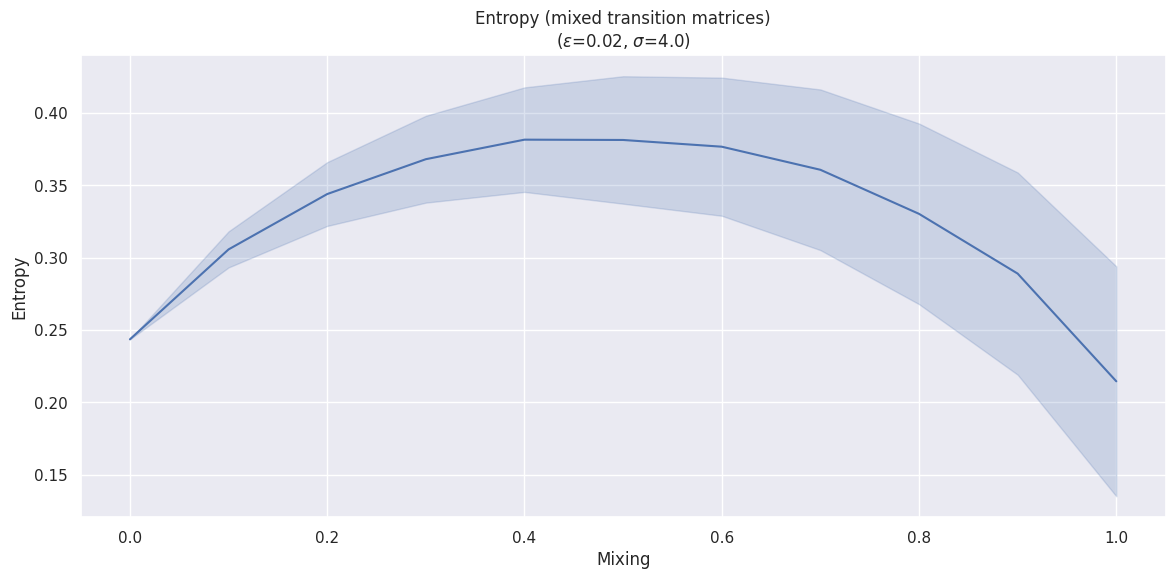

In [87]:
eps = 0.02
sigma = 4.

mixings = np.linspace(0., 1., 11)

entropies_mixing = [
    [
        compute_rho_entropy(calcrho('mixed', q=q, sigma=sigma, eps=eps, mixing=mixing), q)
        for _ in range(1000)
    ]
    for mixing in mixings
]

entropies_mixing_df = pd.DataFrame([
    {
        'mixing': mixing,
        'entropy': ent
    }
    for i, mixing in enumerate(mixings)
    for ent in entropies_mixing[i]
])

fig = plt.figure(figsize=(14, 6))

sns.lineplot(
    data=entropies_mixing_df,
    x='mixing',
    y='entropy',
    errorbar='sd'
)

plt.xlabel('Mixing')
plt.ylabel('Entropy')
plt.title(f'Entropy (mixed transition matrices)\n($\epsilon$={eps}, $\sigma$={sigma})')